<a href="https://colab.research.google.com/github/kurt980/GAN01/blob/main/GAN01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import os
from torch.utils.data import DataLoader
import torch
import torchvision
from matplotlib.pyplot import imshow
from torchvision.io import read_image
import torchvision.transforms as T
from torchvision import datasets, transforms
import PIL
import numpy as np
from matplotlib import image as img
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from scipy.cluster.vq import whiten
import sklearn
from sklearn.cluster import KMeans

In [47]:
# create the color palette
color_list = {'White':[255,255,255],
              'Grey':[128,128,128],'Blue':[0,0,254],'Brown':[150,75,0],'Red':[255,0,0],'Black':[0,0,0],'Green':[0,255,0],'Cyan':[64,244,208],'Purple':[134,1,175],'Orange':[255,165,0],'Yellow':[255,255,0],'Pink':[255,105,180]}

color_list.update((key, [x / 255 for x in value]) for key, value in color_list.items())

In [48]:
def get_color(label_count):

  for i in range(0,9):
    # get most frequent lebels and the center of that cluster
    most_label = label_count.idxmax()[0]
    most_center = centers[most_label]

    label = compare_color(most_center)
    # print(most_center,label)
    if label != 'White':
      break
    else:
      label_count = label_count[1:]

  return(label)

In [49]:
def compare_color(center):
  min = 2**64
  col_lab = "error"
  for i,key in enumerate(color_list):

    dist = np.linalg.norm(np.subtract(color_list.get(key),center))
    if dist < min:
      min = dist
      col_lab = key
    
  return col_lab

In [51]:
# get image
image = img.imread('/content/sample_data/logo_data/003000.png')

# create dataset for pixels
r = []
g = []
b = []
for line in image:
  for pixel in line:
    temp_r, temp_g, temp_b = pixel
    r.append(temp_r)
    g.append(temp_g)
    b.append(temp_b)

df = pd.DataFrame({'red': r,'green': g,'blue': b})

# get scaled for K means (Useless?)
df_scaled = pd.DataFrame({'scaled_red':[],'scaled_green':[],'scaled_blue':[]})
# df_scaled['scaled_red'] = whiten(df['red'])
# df_scaled['scaled_green'] = whiten(df['green'])
# df_scaled['scaled_blue'] = whiten(df['blue'])
df_scaled['scaled_red'] = 255*df['red']
df_scaled['scaled_green'] = 255*df['green']
df_scaled['scaled_blue'] = 255*df['blue']

# K Means cluster
kmeans = KMeans(n_clusters=12, random_state=0).fit(df)

# get cluster centers
centers = kmeans.cluster_centers_
# centers = [x / 255 for x in centers]

# get dominant colors
label_count = pd.DataFrame(kmeans.labels_).value_counts()

# return most dominant(if white, skip)
get_color(label_count)

'Orange'

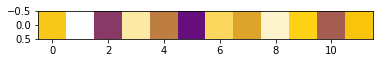

In [52]:
# color of all 9 clusters
plt.imshow([centers])

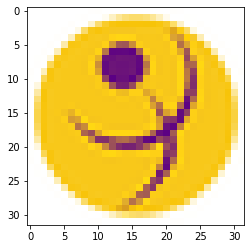

In [53]:
plt.imshow(image)

关于浅色会被识别成为灰色的问题

In [ ]:
centers

array([[0.9965007 , 0.99591565, 0.9951084 ],
       [0.60688126, 0.44876057, 0.3901591 ],
       [0.45832294, 0.2292034 , 0.14893633],
       [0.8370269 , 0.7751026 , 0.7481076 ],
       [0.72278565, 0.6167681 , 0.5736308 ],
       [0.51107264, 0.31234142, 0.23806226],
       [0.9459989 , 0.92665607, 0.9171171 ],
       [0.40705884, 0.14892155, 0.06196082],
       [0.77445686, 0.6815051 , 0.6472708 ],
       [0.66831785, 0.5358101 , 0.48617128],
       [0.8940476 , 0.8535714 , 0.83613443],
       [0.5522282 , 0.3713904 , 0.3024064 ]], dtype=float32)

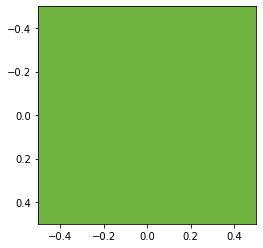

In [ ]:
plt.imshow([[[0.43881804, 0.70771885, 0.2516749]]])

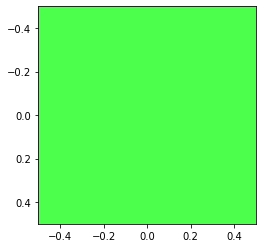

In [ ]:
plt.imshow([[[0.3, 1, 0.3]]])

In [ ]:
np.linalg.norm(np.subtract(color_list.get('Grey'),centers[1]))

In [ ]:
np.linalg.norm(np.subtract(color_list.get('Green'),centers[1]))

0.5842343636630913

In [ ]:

np.linalg.norm(np.subtract([0.5019607843137255, 0.5019607843137255, 0.5019607843137255],[0.43881804, 0.70771885, 0.2516749]))

0.33010060836225275

In [ ]:
np.linalg.norm(np.subtract([0.3, 1.0, 0.3],[0.43881804, 0.70771885, 0.2516749]))

0.327160563278605

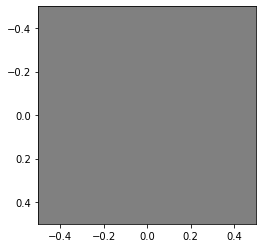

In [ ]:
plt.imshow([[color_list['Grey']]])

In [ ]:
color_list['Grey']

[0.5019607843137255, 0.5019607843137255, 0.5019607843137255]

In [ ]:
color_list['Green']

[0.0, 1.0, 0.0]

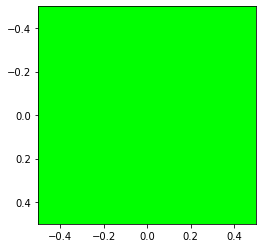

In [ ]:
plt.imshow([[color_list['Green']]])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


还没做完

In [ ]:
get_color(label_count)

[0.9971243 0.9970794 0.9965732] White
[0.9935449  0.6041657  0.12263751] Orange


'Orange'

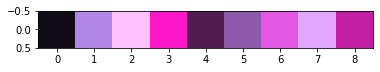

In [ ]:
colors = []
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()
for cluster_center in centers:
  scaled_r, scaled_g, scaled_b = cluster_center
  colors.append((
  scaled_r * r_std,
  scaled_g * g_std,
  scaled_b * b_std
  ))
plt.imshow([colors])
plt.show()

In [ ]:
r_std, g_std, b_std

(0.3237084746360779, 0.30546897649765015, 0.39863067865371704)

In [ ]:
centers

array([[0.20795059, 0.17723393, 0.22431362],
       [2.1420639 , 1.7294426 , 2.263779  ],
       [3.0818055 , 2.4993134 , 3.264698  ],
       [3.0707607 , 0.30779493, 1.9787968 ],
       [0.9881033 , 0.36604375, 0.7926667 ],
       [1.7220329 , 1.1477759 , 1.6806058 ],
       [2.7412367 , 1.1191635 , 2.2493293 ],
       [2.732238  , 2.1477323 , 2.8533442 ],
       [2.3705883 , 0.40862948, 1.6329769 ]], dtype=float32)

In [ ]:
colors

[(0.06731536894926649, 0.0541394685425729, 0.0894182892773685),
 (0.6934042234392592, 0.5282910598446051, 0.902411729171618),
 (0.9976065470437305, 0.7634626923436372, 1.3014087907261),
 (0.9940312708864667, 0.09402180179555586, 0.7888091271330424),
 (0.3198574024864129, 0.11181500858798543, 0.3159812540673812),
 (0.5574366448292736, 0.3506099258913622, 0.6699410183085703),
 (0.8873615464702311, 0.34186973290570677, 0.8966516767504089),
 (0.8844486128921716, 0.6560655745942938, 1.137430535692502),
 (0.7673795234287581, 0.12482362811331527, 0.6509546857311861)]

In [ ]:
label_count

0    341
1    257
3    165
2    140
6     35
4     28
5     23
7     21
8     14
dtype: int64

In [ ]:
centers

array([[0.9971243 , 0.9970794 , 0.9965732 ],
       [0.9935449 , 0.6041657 , 0.12263751],
       [0.06728256, 0.06848693, 0.07061636],
       [0.6939275 , 0.691432  , 0.68862754],
       [0.76946783, 0.49733895, 0.15700278],
       [0.88917303, 0.68474   , 0.43853366],
       [0.8904202 , 0.87540615, 0.8563585 ],
       [0.31970116, 0.24201682, 0.14584497],
       [0.5672269 , 0.5145658 , 0.44789916]], dtype=float32)

In [ ]:
df_scaled

,scaled_red,scaled_blue,scaled_green
0,3.090709,2.509813,3.275254
1,3.090709,2.509813,3.275254
2,3.090709,2.509813,3.275254
3,3.090709,2.509813,3.275254
4,3.090709,2.509813,3.275254
...,...,...,...
1019,3.090709,2.509813,3.275254
1020,3.090709,2.509813,3.275254
1021,3.090709,2.509813,3.275254
1022,3.090709,2.509813,3.275254


In [ ]:
label_count[1:]

1    257
3    165
2    140
6     35
4     28
5     23
7     21
8     14
dtype: int64

In [ ]:
df.loc[250,]

red      0.478431
blue     0.098039
green    0.309804
Name: 250, dtype: float32

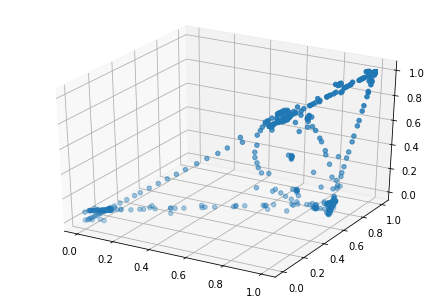

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

Scipy, not working

In [ ]:
cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 9)

In [ ]:
print(cluster_centers)

[[24.229984    2.4771202   2.6291196 ]
 [22.096031    0.345805    0.49749327]
 [23.92156     2.1754675   2.3248355 ]
 [22.396439    0.6506235   0.8013856 ]
 [22.711113    0.9596571   1.1099099 ]
 [23.078775    1.3319868   1.4825549 ]
 [21.826525    0.07458034  0.22555941]
 [23.55537     1.8047521   1.9562579 ]
 [24.485064    2.73444     2.8855076 ]]


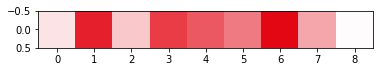

In [ ]:
colors = []
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()
for cluster_center in cluster_centers:
  scaled_r, scaled_g, scaled_b = cluster_center
  colors.append((
  scaled_r * r_std,
  scaled_g * g_std,
  scaled_b * b_std
  ))
plt.imshow([colors])
plt.show()

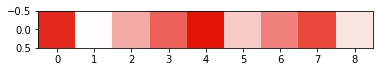

In [ ]:
colors

[(0.0038655392253293354, 0.003406336474808304, 0.003433988397315137),
 (0.0035582395586412, 0.000682421844194376, 0.0008504278520323957)]

In [ ]:
df[['red', 'green', 'blue']].std()

red      0.040816
green    0.362088
blue     0.343405
dtype: float32